In [1]:
import numpy as np
import species

In [2]:
species.SpeciesInit()
database = species.Database()



Initiating species v0.5.5... [DONE]
Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Grid interpolation method: linear


In [3]:
database.add_companion(name=None, verbose=False)
database.add_photometry('HR 8799 e')
database.add_photometry('HR 8799 d')
database.add_photometry('HR 8799 c')
database.add_photometry('HR 8799 b')
database.add_photometry('vlm-plx')

Adding object: beta Pic b [DONE]
Adding object: beta Pic c [DONE]
Adding object: HIP 65426 b [DONE]
Adding object: 51 Eri b

/Users/nasedkin/python-packages/species/species/data/database.py:1273: UserWarning: Found 33 fluxes with NaN in the data of GPI_YJHK. Removing the spectral fluxes that contain a NaN.
  warnings.warn(


 [DONE]
Adding object: HR 8799 b [DONE]
Adding object: HR 8799 c [DONE]
Adding object: HR 8799 d [DONE]
Adding object: HR 8799 e [DONE]
Adding object: HD 95086 b [DONE]
Adding object: PDS 70 b [DONE]
Adding object: PDS 70 c [DONE]
Adding object: 2M 1207 B [DONE]
Adding object: AB Pic B [DONE]
Adding object: HD 206893 B [DONE]
Adding object: RZ Psc B [DONE]
Adding object: GQ Lup B [DONE]
Adding object: PZ Tel B [DONE]
Adding object: kappa And b [DONE]
Adding object: HD 1160 B [DONE]
Adding object: ROXs 12 B [DONE]
Adding object: ROXs 42 Bb [DONE]
Adding object: GJ 504 b [DONE]
Adding object: GU Psc b [DONE]
Adding object: 2M0103 ABb [DONE]
Adding object: 1RXS 1609 B [DONE]
Adding object: GSC 06214 B [DONE]
Adding object: HD 72946 B [DONE]
Adding object: HIP 64892 B [DONE]
Adding object: HD 13724 B [DONE]
Adding object: YSES 1 b [DONE]
Adding object: YSES 1 c [DONE]
Adding object: YSES 2 b [DONE]
Adding object: HD 142527 B [DONE]
Adding object: CS Cha B [DONE]
Adding object: CT Cha B [DO

In [4]:
database.add_isochrones('ames')
database.add_model(model='ames-cond',
                   teff_range=(100., 4000.))
database.add_model(model='ames-dusty',
                   teff_range=(100., 4000.))

Adding isochrones: ames-cond... [DONE]
Database tag: ames-cond
Adding isochrones: ames-dusty... [DONE]
Database tag: ames-dusty
Unpacking AMES-Cond model spectra (150 MB)... [DONE]
Wavelength range (um) = 0.5 - 40
Spectral resolution = 4000
Teff range (K) = 100.0 - 4000.0
Adding AMES-Cond model spectra... [DONE]                               
Grid points stored in the database:
   - Teff = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600.
 3700. 3800. 3900. 4000.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]
Number of grid points per parameter:
   - teff: 40
   - logg: 7
Fix missing grid points with a linear interpolation:
   - teff = 200.0, logg = 5.5
   - teff = 900.0, logg = 2.5
Number of stored grid points: 280
Number of interpolated grid points: 2
Number of missing grid points: 0
Unpacking AMES-Dusty model spectra (

/Users/nasedkin/python-packages/species/species/util/data_util.py:380: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


 [DONE]
Wavelength range (um) = 0.5 - 40
Spectral resolution = 4000
Teff range (K) = 100.0 - 4000.0
Adding AMES-Dusty model spectra... [DONE]                                
Grid points stored in the database:
   - Teff = [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800.
 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5 6. ]
Number of grid points per parameter:
   - teff: 36
   - logg: 6
Fix missing grid points with a linear interpolation:
   - teff = 2100.0, logg = 3.5
   - teff = 2100.0, logg = 4.5
   - teff = 2400.0, logg = 5.0
   - teff = 3100.0, logg = 3.5
   - teff = 3200.0, logg = 3.5
   - teff = 3300.0, logg = 3.5
   - teff = 3400.0, logg = 3.5
   - teff = 3500.0, logg = 3.5
   - teff = 3600.0, logg = 3.5
   - teff = 3700.0, logg = 3.5
   - teff = 3800.0, logg = 3.5
   - teff = 3900.0, logg = 3.5
   - teff = 3900.0, logg = 6.

In [30]:
ages = [5., 20., 100.]  # (Myr)
masses = np.logspace(0., 3., 100)  # (Mjup)
read_iso_cond = species.ReadIsochrone(tag='ames-cond')
read_iso_dusty = species.ReadIsochrone(tag='ames-dusty')

In [31]:
boxes = []

for item in ages:

    modelcolor1 = read_iso_cond.get_color_magnitude(age=item,
                                                    masses=masses,
                                                    filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                    filter_mag='MKO/NSFCam.Lp')

    modelcolor2 = read_iso_dusty.get_color_magnitude(age=item,
                                                     masses=masses,
                                                     filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                     filter_mag='MKO/NSFCam.Lp')

    boxes.append(modelcolor1)
    boxes.append(modelcolor2)
objects = [('HR 8799 b', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 c', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 d', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 e', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('kappa And b', 'Subaru/CIAO.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('GSC 06214 B', 'MKO/NSFCam.H', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Lp'),
           ('ROXs 42 Bb', 'Keck/NIRC2.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('51 Eri b', 'MKO/NSFCam.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('2M 1207 B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('2M0103 ABb', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('1RXS 1609 B', 'Gemini/NIRI.H-G0203w', 'Gemini/NIRI.Lprime-G0207w', 'Gemini/NIRI.Lprime-G0207w'),
           ('beta Pic b', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('PZ Tel B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HD 206893 B', 'Paranal/SPHERE.IRDIS_B_H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')]
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                      filter_mag='MKO/NSFCam.Lp')
color_field = colormag.get_color_magnitude(object_type='field')
color_young = colormag.get_color_magnitude(object_type='young')
boxes.append(color_field)
boxes.append(color_young)

/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.106399733137301, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 625.565258991546, 'logg': 3.106399733137301, 'radius': 1.3796728782198977, 'distance': 10.0}.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.146838231147555, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 650.0600876031777, 'logg': 3.146838231147555, 'radius': 1.3700106613896685, 'distance': 10.0}.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.1682899054990465, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'tef

Plotting color-magnitude diagram: plots/H-LColorMag.pdf... [DONE]


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='H $-$ L$^\\prime$', ylabel='M$_\\mathregular{L\\prime}$'>)

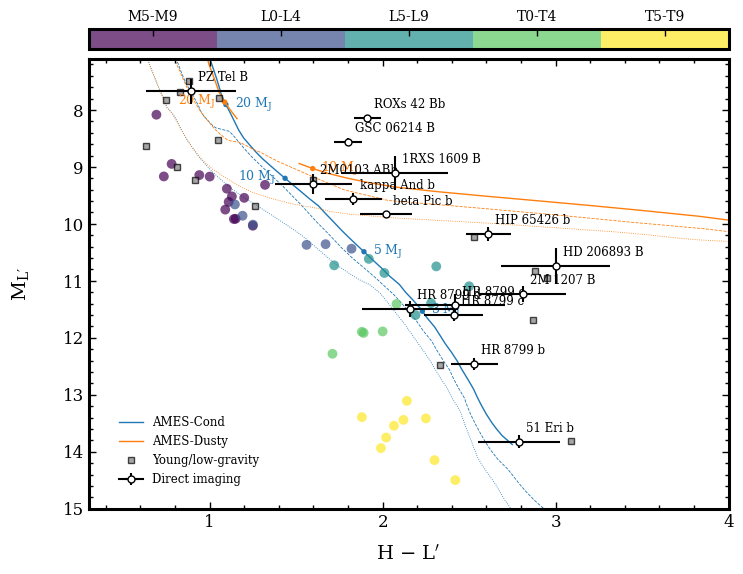

In [32]:
species.plot_color_magnitude(boxes=boxes,
                             objects=objects,
                             mass_labels={'ames-cond': [(3., 'right'), (5., 'right'), (10., 'left'), (20., 'right')],
                                          'ames-dusty': [(10., 'right'), (15., 'left'), (20., 'left')]},
                             teff_labels=None,#[(1500., 'right'), (2000., 'right'), (3000., 'left')],
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             label_x=r'H $-$ L$^\prime$',
                             label_y=r'M$_\mathregular{L\prime}$',
                             xlim=(0.3, 4.),
                             ylim=(15., 7.1),
                             offset=(-0.08, -0.09),
                             legend=(0.04, 0.04),
                             output="plots/H-LColorMag.pdf")

In [33]:
boxes = []

for item in ages:
    modelcolor1 = read_iso_cond.get_color_magnitude(age=item,
                                                    masses=masses,
                                                    filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.K'),
                                                    filter_mag='MKO/NSFCam.J')

    modelcolor2 = read_iso_dusty.get_color_magnitude(age=item,
                                                     masses=masses,
                                                     filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.K'),
                                                    filter_mag='MKO/NSFCam.J')

    boxes.append(modelcolor1)
    boxes.append(modelcolor2)
objects = [('HR 8799 b', 'Paranal/SPHERE.IRDIS_B_J', 'Keck/NIRC2.Ks', 'Keck/NIRC2.Ks'),
           ('HR 8799 c', 'Paranal/SPHERE.IRDIS_B_J', 'Keck/NIRC2.Ks', 'Keck/NIRC2.Ks'),
           ('HR 8799 d', 'Paranal/SPHERE.IRDIS_B_J', 'Keck/NIRC2.Ks', 'Keck/NIRC2.Ks'),
           ('HR 8799 e', 'Paranal/SPHERE.IRDIS_B_J', 'Keck/NIRC2.Ks', 'Keck/NIRC2.Ks'),
           ('kappa And b', 'Subaru/CIAO.J', 'Subaru/CIAO.H', 'Subaru/CIAO.H'),
           ('GSC 06214 B', 'MKO/NSFCam.J', 'MKO/NSFCam.Kp', 'MKO/NSFCam.Kp'),
           ('ROXs 42 Bb', 'Keck/NIRC2.J', 'Keck/NIRC2.Ks', 'Keck/NIRC2.Ks'),
           ('51 Eri b', 'MKO/NSFCam.J', 'MKO/NSFCam.K', 'MKO/NSFCam.K'),
           ('2M 1207 B', 'Paranal/NACO.J', 'Paranal/NACO.Ks', 'Paranal/NACO.Ks'),
           ('2M0103 ABb', 'Paranal/NACO.J', 'Paranal/NACO.Ks', 'Paranal/NACO.Ks'),
           ('1RXS 1609 B', 'Gemini/NIRI.J-G0202w', 'Gemini/NIRI.K-G0204w', 'Gemini/NIRI.K-G0204w'),
           ('beta Pic b', 'Paranal/NACO.J', 'Paranal/NACO.Ks', 'Paranal/NACO.Ks'),
           ('PZ Tel B', 'Paranal/NACO.J', 'Paranal/NACO.Ks', 'Paranal/NACO.Ks')]
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.K'),
                                      filter_mag='MKO/NSFCam.J')
color_field = colormag.get_color_magnitude(object_type='field')
color_young = colormag.get_color_magnitude(object_type='young')
boxes.append(color_field)
boxes.append(color_young)

/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.106399733137301, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 625.565258991546, 'logg': 3.106399733137301, 'radius': 1.3796728782198977, 'distance': 10.0}.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.146838231147555, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 650.0600876031777, 'logg': 3.146838231147555, 'radius': 1.3700106613896685, 'distance': 10.0}.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.1682899054990465, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'tef

Plotting color-magnitude diagram: plots/J-KColorMag.pdf... [DONE]


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='J $-$ K', ylabel='M$_\\mathregular{K}$'>)

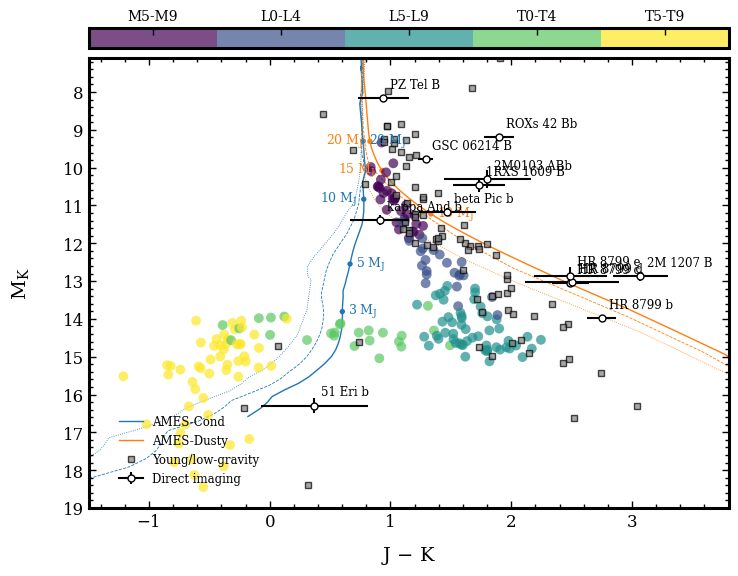

In [34]:
species.plot_color_magnitude(boxes=boxes,
                             objects=objects,
                             mass_labels={'ames-cond': [(3., 'right'), (5., 'right'), (10., 'left'), (20., 'right')],
                                          'ames-dusty': [(10., 'right'), (15., 'left'), (20., 'left')]},
                             teff_labels=None,#[(1500., 'right'), (2000., 'right'), (3000., 'left')],
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             label_x=r'J $-$ K',
                             label_y=r'M$_\mathregular{K}$',
                             xlim=(-1.5, 3.8),
                             ylim=(19., 7.1),
                             offset=(-0.08, -0.09),
                             legend=(0.04, 0.04),
                             output="plots/J-KColorMag.pdf")

/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.106399733137301, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 625.565258991546, 'logg': 3.106399733137301, 'radius': 1.3796728782198977, 'distance': 10.0}.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.146838231147555, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 650.0600876031777, 'logg': 3.146838231147555, 'radius': 1.3700106613896685, 'distance': 10.0}.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/read/read_isochrone.py:910: UserWarning: The value of logg is 3.1682899054990465, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'tef

Plotting color-magnitude diagram: plots/JWST_ColorMag.pdf... [DONE]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='F1140C $-$ F1065C', ylabel='M$_\\mathregular{F1140C}$'>)

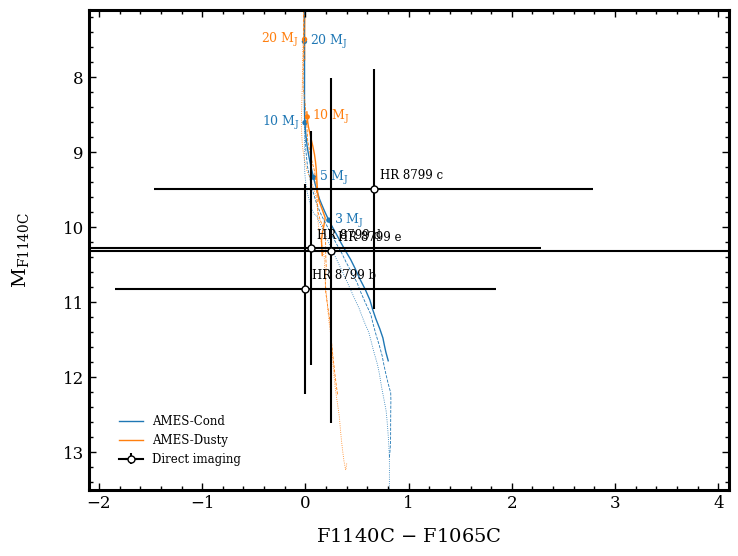

In [36]:
boxes = []

for item in ages:
    modelcolor1 = read_iso_cond.get_color_magnitude(age=item,
                                                    masses=masses,
                                                    filters_color=("JWST/MIRI.F1065C", "JWST/MIRI.F1140C"),
                                                    filter_mag="JWST/MIRI.F1065C")

    modelcolor2 = read_iso_dusty.get_color_magnitude(age=item,
                                                     masses=masses,
                                                     filters_color=("JWST/MIRI.F1065C", "JWST/MIRI.F1140C"),
                                                     filter_mag="JWST/MIRI.F1065C")

    boxes.append(modelcolor1)
    boxes.append(modelcolor2)
objects = [('HR 8799 b', "JWST/MIRI.F1065C", "JWST/MIRI.F1140C", "JWST/MIRI.F1140C"),
           ('HR 8799 c', "JWST/MIRI.F1065C", "JWST/MIRI.F1140C", "JWST/MIRI.F1140C"),
           ('HR 8799 d', "JWST/MIRI.F1065C", "JWST/MIRI.F1140C", "JWST/MIRI.F1140C"),
           ('HR 8799 e', "JWST/MIRI.F1065C", "JWST/MIRI.F1140C", "JWST/MIRI.F1140C")]
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=("JWST/MIRI.F1065C", "JWST/MIRI.F1140C"),
                                      filter_mag="JWST/MIRI.F1065C")
#color_field = colormag.get_color_magnitude(object_type='field')
#color_young = colormag.get_color_magnitude(object_type='young')
#boxes.append(color_field)
#boxes.append(color_young)
species.plot_color_magnitude(boxes=boxes,
                             objects=objects,
                             mass_labels={'ames-cond': [(3., 'right'), (5., 'right'), (10., 'left'), (20., 'right')],
                                          'ames-dusty': [(10., 'right'), (15., 'left'), (20., 'left')]},
                             teff_labels=None,#[(1500., 'right'), (2000., 'right'), (3000., 'left')],
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             label_x=r'F1140C $-$ F1065C',
                             label_y=r'M$_\mathregular{F1140C}$',
                             xlim=(-2.1, 4.1),
                             ylim=(13.5, 7.1),
                             offset=(-0.08, -0.09),
                             legend=(0.04, 0.04),
                             output="plots/JWSTMIRI_ColorMag.pdf")